In [ ]:
# Questions to be answered in this dataset
# 1. Highest release year
# 2. Highest profit rate
# 3. Length of the movies liked by audience
# 4. Average runtime of movies over the years
# 5. Highest number of movie release month

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Data wrangling - Exploring the dataset
# Explore column names by printing first row.
df = pd.read_csv('tmdb-movies.csv')
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [5]:
df.tail(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [ ]:
# Observation for above- columns 'budget', 'revenue' have '0' value.
# Assuming currency in US dollars($)

In [4]:
#  to get a concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
#  to view some basic statistical details like percentile, mean, std etc. 
# of a data frame or a series of numeric values. 
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
# Finding null or empty values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [9]:
# Filling the null values with '0'
df.fillna(0)
print()

In [ ]:
# Data Cleaning -
# Removing duplicates
# Release date into date-time format
# Dropping the columns not necessary for answering questions
# Drop movies having budget and revenue value 0

In [11]:
# Removing duplicates
sum(df.duplicated())

1

In [12]:
# Dropping the duplicate row
df.drop_duplicates(inplace = True)

In [14]:
# Checking whether the duplicate was removed
df.shape

(10865, 21)

In [15]:
# Changing release date to date-time format
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

In [16]:
# Dropping columns not useful for analysis
df.drop(['budget_adj','revenue_adj','overview','imdb_id','homepage','tagline'],axis =1,inplace = True)

In [17]:
# Checking whether columns were removed
df.shape

(10865, 15)

In [21]:
# Checking how many movies have 0 values in the budget column
df[(df['budget']==0)]
# I gor rows with 0 values in budget column = 5696

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
30,280996,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,Bill Condon,london|detective|sherlock holmes,103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,2015-06-19,425,6.4,2015
36,339527,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,Afonso Poyart,thriller|serial killer|psychic|fbi agent|intrigue,101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,2015-09-03,474,6.2,2015
72,284289,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,Jean-Baptiste LÃ©onetti,desert|hunting,95,Thriller,Furthur Films,2015-04-17,81,5.5,2015
74,347096,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,Anne K. Black,sword|magic|sorcery|necromancer|woman director,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,2015-06-24,27,5.1,2015
75,308369,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,Alfonso Gomez-Rejon,tattoo|high school|leukemia|friends|parody,105,Comedy|Drama,Indian Paintbrush,2015-06-12,569,7.7,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10860,5060,0.087034,0,0,Carry On Screaming!,Kenneth Williams|Jim Dale|Harry H. Corbett|Joa...,Gerald Thomas,monster|carry on|horror spoof,87,Comedy,Peter Rogers Productions|Anglo-Amalgamated Fil...,2066-05-20,13,7.0,1966
10861,21,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,surfer|surfboard|surfing,95,Documentary,Bruce Brown Films,2066-06-15,11,7.4,1966
10862,20379,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,car race|racing|formula 1,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,2066-12-21,20,5.7,1966
10863,39768,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,car|trolley|stealing car,94,Mystery|Comedy,Mosfilm,2066-01-01,11,6.5,1966


In [22]:
# Checking how many movies have 0 values in the revenue column
df[(df['revenue']==0)]
# # I gor rows with 0 values in revenue column = 6016

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
48,265208,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,Simon West,gambling|bodyguard|remake,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,2015-01-14,481,5.3,2015
67,334074,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,James McTeigue,new year's eve|fire|showdown|terrorist|embassy,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,2015-05-21,280,5.4,2015
74,347096,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,Anne K. Black,sword|magic|sorcery|necromancer|woman director,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,2015-06-24,27,5.1,2015
75,308369,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,Alfonso Gomez-Rejon,tattoo|high school|leukemia|friends|parody,105,Comedy|Drama,Indian Paintbrush,2015-06-12,569,7.7,2015
92,370687,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,A. Todd Smith,sword|magic|sorcery|necromancer,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,2015-12-19,11,5.4,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,surfer|surfboard|surfing,95,Documentary,Bruce Brown Films,2066-06-15,11,7.4,1966
10862,20379,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,car race|racing|formula 1,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,2066-12-21,20,5.7,1966
10863,39768,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,car|trolley|stealing car,94,Mystery|Comedy,Mosfilm,2066-01-01,11,6.5,1966
10864,21449,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,spoof,80,Action|Comedy,Benedict Pictures Corp.,2066-11-02,22,5.4,1966


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10865 non-null  int64         
 1   popularity            10865 non-null  float64       
 2   budget                10865 non-null  int64         
 3   revenue               10865 non-null  int64         
 4   original_title        10865 non-null  object        
 5   cast                  10789 non-null  object        
 6   director              10821 non-null  object        
 7   keywords              9372 non-null   object        
 8   runtime               10865 non-null  int64         
 9   genres                10842 non-null  object        
 10  production_companies  9835 non-null   object        
 11  release_date          10865 non-null  datetime64[ns]
 12  vote_count            10865 non-null  int64         
 13  vote_average    

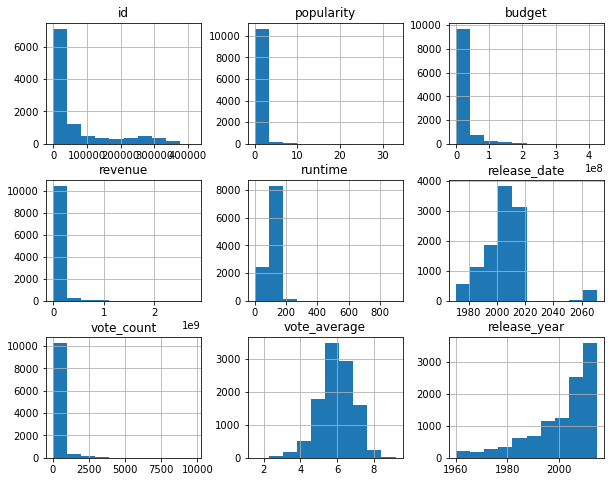

In [23]:
# How the histogram of data looks like
df.hist(figsize=(10,8));

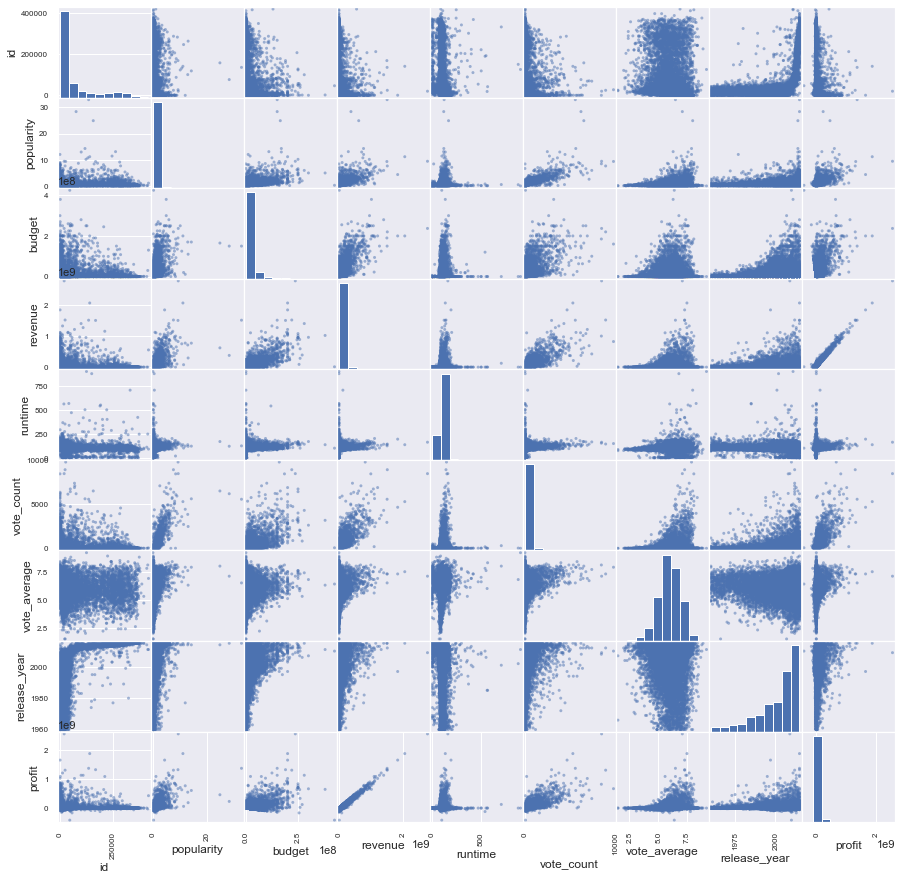

In [55]:
# Scatter plot of all the values
pd.plotting.scatter_matrix(df,figsize=(15,15));

In [ ]:
# Question 1 - Highest release year

release_year
2011    540
2012    588
2013    659
2014    700
2015    629
Name: id, dtype: int64


Text(0, 0.5, 'Number of Movies')

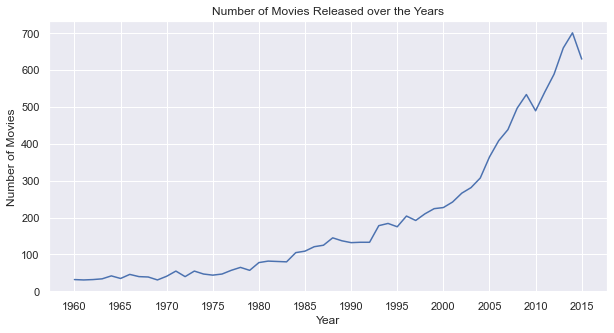

In [35]:
# Grouping the data according to their release year and counting total 
# number of movies released every year
data = df.groupby('release_year').count()['id']
print(data.tail())

df.groupby('release_year').count()['id'].plot(xticks = np.arange(1960,2016,5))

# Setting figure size and labels
sns.set(rc={'figure.figsize':(8,5)})
plt.title("Number of Movies Released over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Movies")

In [ ]:
# Seeing the plot we can tell that year 2014 has the highest release of
# movies - 700

In [ ]:
# Question  2. Highest profit rate

Text(0, 0.5, 'Average Profit')

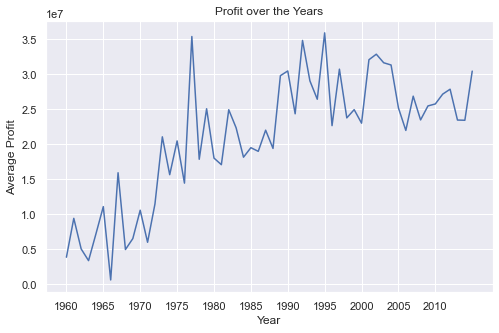

In [42]:
# Finding which year had highest profit
# First analyze the profit earned by movies every year. Then take the 
# average profit and group the data with the release year to find mean and
# plot. 

df['profit'] = df['revenue'] - df['budget'] # adding new column (profit)

df.groupby('release_year')['profit'].mean().plot(xticks = np.arange(1960,2011,5))

plt.title("Profit over the Years")
plt.xlabel("Year")
plt.ylabel("Average Profit")

In [ ]:
# Above plot shows that the highest profit rate were between 2001-03 and 
# lowest were between 1960-70

In [ ]:
# Question 3. Length of the movies liked by audience

Text(0, 0.5, 'Average Popularity')

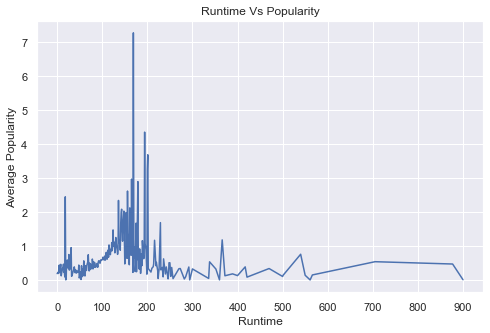

In [48]:
# Grouping the data according to their runtime and finding the mean 
# popularity and plot

df.groupby('runtime')['popularity'].mean().plot(xticks = np.arange(0,1000,100))

plt.title("Runtime Vs Popularity")
plt.xlabel("Runtime")
plt.ylabel("Average Popularity")

In [ ]:
# From the plot we can conclude that runtime of 150-180 are popular. 

In [ ]:
# Question 4. Average runtime of movies over the years

Text(0, 0.5, 'Runtime')

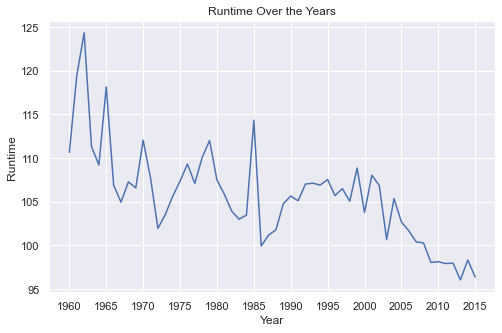

In [49]:
# Grouping the data according to their release year and finding the mean and plot
df.groupby('release_year')['runtime'].mean().plot(xticks = np.arange(1960,2016,5))

plt.title("Runtime Over the Years")
plt.xlabel("Year")
plt.ylabel("Runtime")

In [ ]:
# From the plot we can conclude that over the years the runtime is decreasing


In [ ]:
# Question 5. Highest number of movie release month

Text(0, 0.5, 'Number of Movie Released')

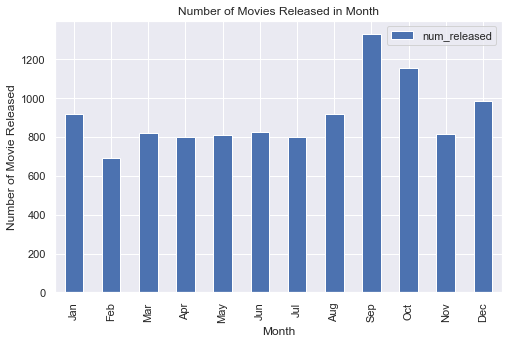

In [54]:
# pull out month from the release date.
release_month = df['release_date'].dt.month

# counting the movies in each month
num_released = release_month.value_counts().sort_index()
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
num_released = pd.DataFrame(num_released)
num_released['month'] = months

# change new dataframe column name
num_released.rename(columns = {'release_date':'num_released'},inplace=True)

# Plot
num_released.plot(x = 'month', kind = 'bar')

plt.title("Number of Movies Released in Month")
plt.xlabel("Month")
plt.ylabel("Number of Movie Released")

In [ ]:
# From the plot its seen that movies are released in higher numbers during 
# September and October.